In [1]:
!pip install pystan
!pip install fbprophet
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 23.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [36]:
from google.colab import files
uploaded = files.upload()

df_jamaica = pd.read_csv(
    "Jamaica Monthly Tourist Visitors v2.csv",
)

# Review the first and last five rows of the DataFrame
df_jamaica.tail()

Saving Jamaica Monthly Tourist Visitors v2.csv to Jamaica Monthly Tourist Visitors v2 (7).csv


,ds,y
190,11/1/2021,"152,097"
191,12/1/2021,"223,333"
192,1/1/2022,"131,730"
193,2/1/2022,"162,882"
194,3/1/2022,"215,789"


In [37]:
model_jamaica = Prophet()
model_jamaica

In [38]:
df_jamaica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      195 non-null    object
 1   y       195 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [42]:
df_jamaica['y']=df_jamaica['y'].str.replace(',','')
df_jamaica['y']=df_jamaica['y'].str.replace('-','0')

In [43]:
df_jamaica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      195 non-null    object
 1   y       195 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [44]:
df_jamaica['y']=df_jamaica['y'].astype(int)

In [45]:
df_jamaica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      195 non-null    object
 1   y       195 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [46]:
model_jamaica.fit(df_jamaica)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_jamaica_trends = model_jamaica.make_future_dataframe(periods=24, freq='M')

# View the last five rows of the future_mercado_trends DataFrame
future_jamaica_trends


,ds
0,2006-01-01
1,2006-02-01
2,2006-03-01
3,2006-04-01
4,2006-05-01
...,...
214,2023-10-31
215,2023-11-30
216,2023-12-31
217,2024-01-31


In [49]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_jamaica = model_jamaica.predict(future_jamaica_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_jamaica


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-01,142087.729697,93085.900959,188789.066845,142087.729697,142087.729697,885.459182,885.459182,885.459182,885.459182,885.459182,885.459182,0.0,0.0,0.0,142973.188879
1,2006-02-01,142409.887022,98511.273076,197706.411246,142409.887022,142409.887022,7693.961099,7693.961099,7693.961099,7693.961099,7693.961099,7693.961099,0.0,0.0,0.0,150103.848121
2,2006-03-01,142700.867831,132423.553837,222811.596183,142700.867831,142700.867831,31818.644044,31818.644044,31818.644044,31818.644044,31818.644044,31818.644044,0.0,0.0,0.0,174519.511874
3,2006-04-01,143023.025155,99205.638753,197422.067015,143023.025155,143023.025155,1809.980555,1809.980555,1809.980555,1809.980555,1809.980555,1809.980555,0.0,0.0,0.0,144833.005709
4,2006-05-01,143334.790307,83108.461044,176077.673737,143334.790307,143334.790307,-12549.575302,-12549.575302,-12549.575302,-12549.575302,-12549.575302,-12549.575302,0.0,0.0,0.0,130785.215005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2023-10-31,124755.237697,61981.603421,160815.703544,123474.951467,125867.863128,-14073.574195,-14073.574195,-14073.574195,-14073.574195,-14073.574195,-14073.574195,0.0,0.0,0.0,110681.663503
215,2023-11-30,124053.425392,120208.813679,215134.493884,122708.797917,125244.437835,43239.932764,43239.932764,43239.932764,43239.932764,43239.932764,43239.932764,0.0,0.0,0.0,167293.358156
216,2023-12-31,123328.219343,74773.697050,174829.427501,121904.503901,124635.248419,-399.744351,-399.744351,-399.744351,-399.744351,-399.744351,-399.744351,0.0,0.0,0.0,122928.474992
217,2024-01-31,122603.013294,81834.284532,173413.906974,121101.822130,124005.864517,6010.976252,6010.976252,6010.976252,6010.976252,6010.976252,6010.976252,0.0,0.0,0.0,128613.989546


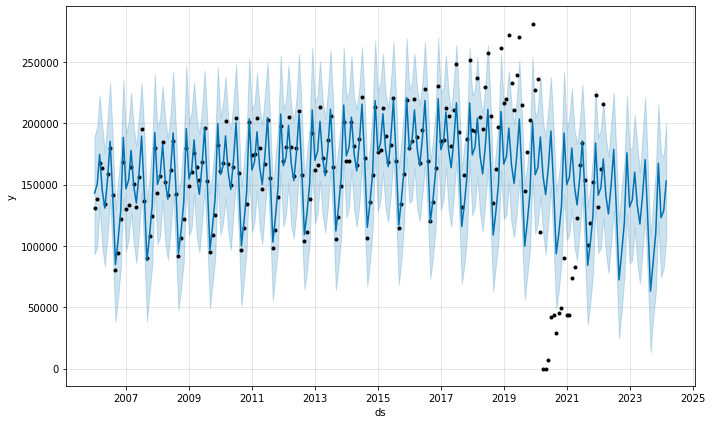

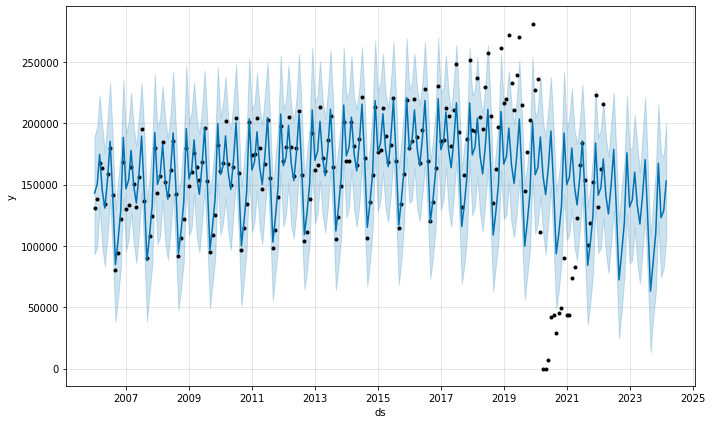

In [50]:
model_jamaica.plot(forecast_jamaica)

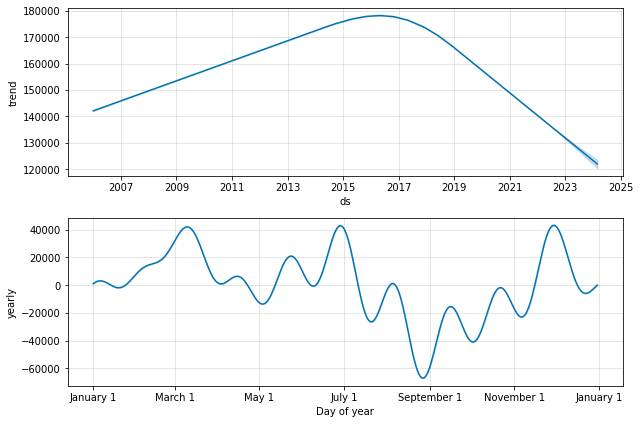

In [51]:
# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
figure_jamaica = model_jamaica.plot_components(forecast_jamaica)

In [62]:
df_jamaica['ds'] = pd.to_datetime(df_jamaica['ds'])
df_jamaica.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      195 non-null    datetime64[ns]
 1   y       195 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 KB


In [67]:
df_jamaica_np = df_jamaica.loc[(df_jamaica['ds'] < '2020-03-01')]
df_jamaica_np

,ds,y
0,2006-01-01,130695
1,2006-02-01,138428
2,2006-03-01,167439
3,2006-04-01,163272
4,2006-05-01,133902
...,...,...
165,2019-10-01,176514
166,2019-11-01,202783
167,2019-12-01,281115
168,2020-01-01,227200


In [68]:
model_jamaica_np = Prophet()
model_jamaica_np

In [69]:
model_jamaica_np.fit(df_jamaica_np)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_jamaica_np = model_jamaica_np.make_future_dataframe(periods=48, freq='M')

# View the last five rows of the future_mercado_trends DataFrame
future_jamaica_np

,ds
0,2006-01-01
1,2006-02-01
2,2006-03-01
3,2006-04-01
4,2006-05-01
...,...
213,2023-09-30
214,2023-10-31
215,2023-11-30
216,2023-12-31


In [71]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_jamaica_np = model_jamaica_np.predict(future_jamaica_np)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_jamaica_np


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-01,136334.744681,128198.838544,144197.451926,136334.744681,136334.744681,-422.970415,-422.970415,-422.970415,-422.970415,-422.970415,-422.970415,0.0,0.0,0.0,135911.774265
1,2006-02-01,136739.097126,132252.772327,148061.154098,136739.097126,136739.097126,3411.539641,3411.539641,3411.539641,3411.539641,3411.539641,3411.539641,0.0,0.0,0.0,140150.636767
2,2006-03-01,137104.318690,164882.606698,180877.714108,137104.318690,137104.318690,35654.068175,35654.068175,35654.068175,35654.068175,35654.068175,35654.068175,0.0,0.0,0.0,172758.386865
3,2006-04-01,137508.671136,140875.949636,156756.528085,137508.671136,137508.671136,11675.116515,11675.116515,11675.116515,11675.116515,11675.116515,11675.116515,0.0,0.0,0.0,149183.787651
4,2006-05-01,137899.979954,121424.227547,137786.808031,137899.979954,137899.979954,-8427.937349,-8427.937349,-8427.937349,-8427.937349,-8427.937349,-8427.937349,0.0,0.0,0.0,129472.042606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2023-09-30,281214.162919,229212.694465,247357.699822,276824.161135,285618.897191,-43277.660344,-43277.660344,-43277.660344,-43277.660344,-43277.660344,-43277.660344,0.0,0.0,0.0,237936.502574
214,2023-10-31,282388.282580,250780.640661,268456.002364,277827.953407,286928.908864,-22791.055230,-22791.055230,-22791.055230,-22791.055230,-22791.055230,-22791.055230,0.0,0.0,0.0,259597.227350
215,2023-11-30,283524.527414,314733.354239,332900.560234,278854.756961,288204.595678,40255.332895,40255.332895,40255.332895,40255.332895,40255.332895,40255.332895,0.0,0.0,0.0,323779.860309
216,2023-12-31,284698.647076,270804.305606,290409.420856,279967.159391,289541.437420,-4250.802606,-4250.802606,-4250.802606,-4250.802606,-4250.802606,-4250.802606,0.0,0.0,0.0,280447.844470


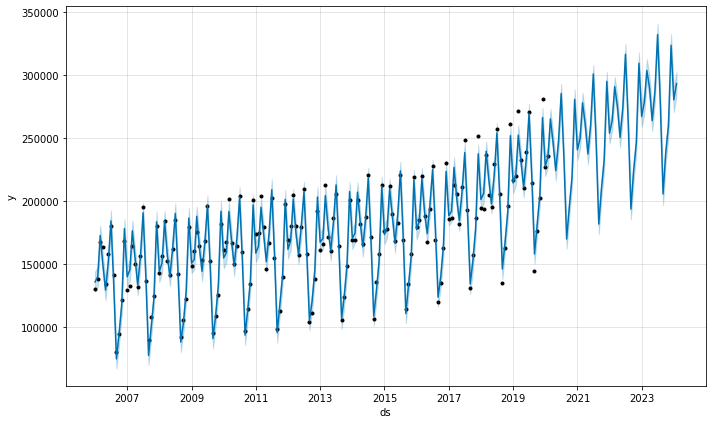

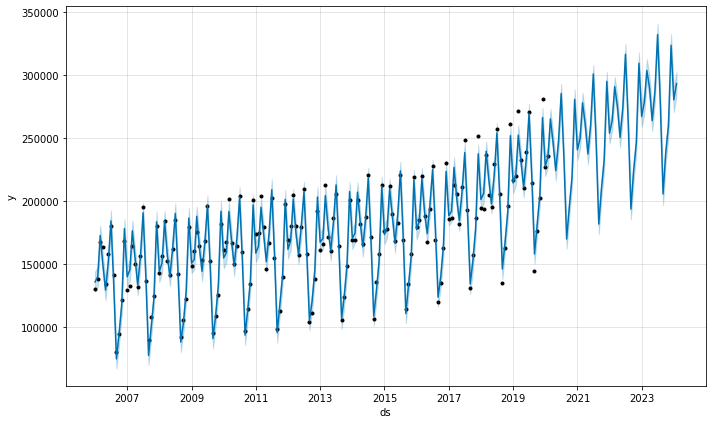

In [73]:
model_jamaica_np.plot(forecast_jamaica_np)

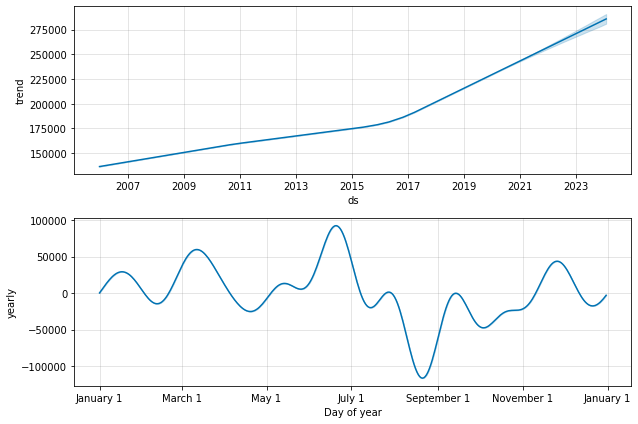

In [74]:
# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
figure_jamaica_np = model_jamaica_np.plot_components(forecast_jamaica_np)